In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# u-chart

- https://en.wikipedia.org/wiki/U-chart (last accessed: 28 March 2020)
- https://www.youtube.com/watch?v=6GcUm6X3fSQ&t=373s (last accessed: 1 April 2020)
- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/control-charts/how-to/attribute-control-charts/u-chart/methods-and-formulas/methods-and-formulas/ (last accessed: 19 April 2020)

Number of defectives for subgroup $i$: $x_{i}$

Number of values in subgroup $i$: $n_{i}$

Process mean: $u$

Central line: $\mu = \bar{u} = \dfrac{\Sigma x_{i}}{\Sigma n_{i}}$ (if not specified)

Standard deviation: $\sigma = \sqrt{\dfrac{u}{n_{i}}}$

Upper control line: $UCL_{u} = u + 3\cdot\sqrt{\dfrac{u}{n_{i}}}$

Lower control line: $LCL_{u} = u - 3\cdot\sqrt{\dfrac{u}{n_{i}}}$ or $LCL_{u} = 0$

Plotted statistics: $u_{i} = \dfrac{x_{i}}{n_{i}}$

Description:

The u chart is an attribute control chart used to study the proportion of nonconformities or defects. A proportion is used instead of a count when the opportunity for nonconformities changes from one sample to another, and so the fair way to express
frequency of nonconformities is on a per-unit basis. Often, information about the types of nonconformities is collected on the same chart to help determine the causes of variation.

In [2]:
# Due to the lack of a dataset, I am using the one from the YouTube video
# Create the CSV file
observation = np.arange(1,21)
sample_size = np.array([550, 520, 530, 580, 520, 520, 480, 550, 570, 590, 550, 520, 600, 570, 550, 560, 580, 530, 520, 540])
defective = np.array([50, 49, 47, 51, 47, 48, 39, 52, 49, 48, 50, 51, 70, 48, 52, 50, 51, 49, 48, 49])
numpy_data = np.vstack([observation, sample_size, defective])


# Calling DataFrame constructor after to create the dataset, with columns specified 
udata = pd.DataFrame({'Observation':numpy_data[0,:], 'Sample size':numpy_data[1,:], 'Defective samples':numpy_data[2,:]})

udata.to_csv(r'data\uchart_data.csv',index=False)

In [3]:
def read_data(path):
    return pd.read_csv(path)

# Read the data
path = r'data\uchart_data.csv'
udata = read_data(path)
udata.head()

,Observation,Sample size,Defective samples
0,1,550,50
1,2,520,49
2,3,530,47
3,4,580,51
4,5,520,47


In [4]:
# Clean data
del udata['Observation']
udata.head()

,Sample size,Defective samples
0,550,50
1,520,49
2,530,47
3,580,51
4,520,47


In [5]:
# Compute the proportion of defectives for one subgroup
def plotted_statistics(num_defectives, num_samples):
    return num_defectives / num_samples

udata['Mean'] = plotted_statistics(udata['Defective samples'], udata['Sample size'])
udata.head()

,Sample size,Defective samples,Mean
0,550,50,0.090909
1,520,49,0.094231
2,530,47,0.088679
3,580,51,0.087931
4,520,47,0.090385


In [6]:
def compute_parameters(num_defectives, num_samples, u=None):
    # Compute the center line p_bar
    if u is None:
        u = num_defectives.sum() / num_samples.sum()
    
    # Compute the upper and lower control limit
    ucl = u + 3*np.sqrt(num_samples.rdiv(u))
    ucl_mean = ucl.mean()
    
    lcl = u - 3*np.sqrt(num_samples.rdiv(u))
    lcl = np.maximum(lcl, 0)
    lcl_mean = lcl.mean()
    
    return u, ucl, lcl, ucl_mean, lcl_mean
    
u, ucl, lcl, ucl_mean, lcl_mean = compute_parameters(udata['Defective samples'], udata['Sample size'], u=0.09)
ubar, uclbar, lclbar, uclbar_mean, lclbar_mean = compute_parameters(udata['Defective samples'], udata['Sample size'])

print(f'u: {u:.4f}')
print(f'Lower control limit:\n{lcl}')
print(f'Upper control limit:\n{ucl}')
print(f'Mean of lower control limit:{lcl_mean:.4f}')
print(f'Mean of upper control limit:{ucl_mean:.4f}')
print('\n\n')
print(f'ubar: {ubar:.4f}')
print(f'Lower control limit:\n{lclbar}')
print(f'Upper control limit:\n{uclbar}')
print(f'Mean of lower control limit:{lclbar_mean:.4f}')
print(f'Mean of upper control limit:{uclbar_mean:.4f}')

u: 0.0900
Lower control limit:
0     0.051624
1     0.050532
2     0.050906
3     0.052630
4     0.050532
5     0.050532
6     0.048921
7     0.051624
8     0.052303
9     0.052948
10    0.051624
11    0.050532
12    0.053258
13    0.052303
14    0.051624
15    0.051968
16    0.052630
17    0.050906
18    0.050532
19    0.051270
Name: Sample size, dtype: float64
Upper control limit:
0     0.128376
1     0.129468
2     0.129094
3     0.127370
4     0.129468
5     0.129468
6     0.131079
7     0.128376
8     0.127697
9     0.127052
10    0.128376
11    0.129468
12    0.126742
13    0.127697
14    0.128376
15    0.128032
16    0.127370
17    0.129094
18    0.129468
19    0.128730
Name: Sample size, dtype: float64
Mean of lower control limit:0.0515
Mean of upper control limit:0.1285



ubar: 0.0913
Lower control limit:
0     0.052654
1     0.051555
2     0.051932
3     0.053667
4     0.051555
5     0.051555
6     0.049932
7     0.052654
8     0.053338
9     0.053988
10    0.052654
11    0.

In [7]:
# Plot the u-chart
def plot_uchart(x_axis, y_axis, mu, ucl, lcl, ucl_mean, lcl_mean, title, x_label, y_label):
    plt.style.use('seaborn')
    fig, ax = plt.subplots()

    ax.plot(x_axis, y_axis, 'o-', c='red')

    mu_line = mu*np.ones(x_axis.size)
    ax.plot(mu_line, c='yellow', label=f'Central line={mu:.4f}')

    ucl_line = ucl*np.ones(x_axis.size)
    ax.plot(ucl_line, c='green', label=f'Upper control limit={ucl_mean:.4f}')

    lcl_line = lcl*np.ones(x_axis.size)
    ax.plot(lcl_line, c='blue', label=f'Lower control limit={lcl_mean:.4f}')

    ax.set_xticks(np.arange(x_axis.size))
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_title(title, fontsize=25)
    
    ax.set_xlabel(x_label, fontsize=15)
    
    ax.set_ylabel(y_label, fontsize=15)

C:\Users\PC\AppData\Local\Temp\ipykernel_2056\4220762308.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


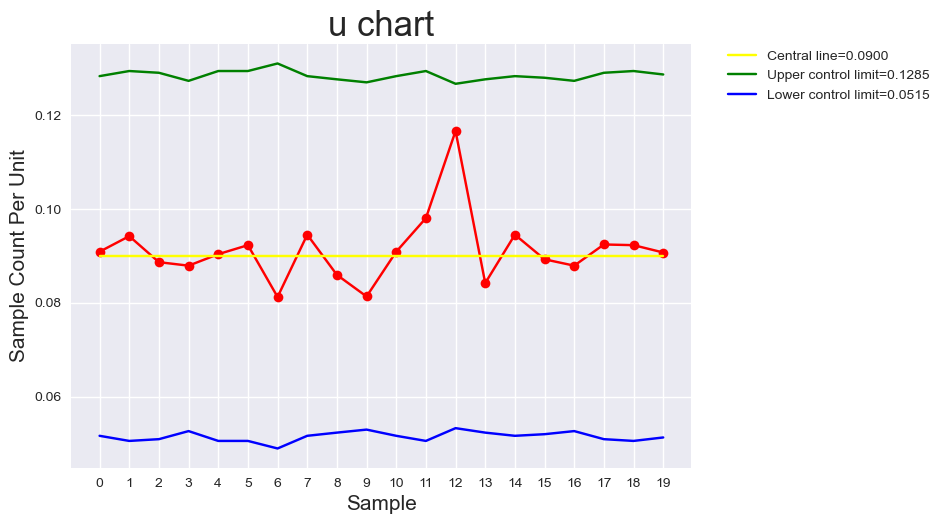

In [8]:
# With predefined u-value
plot_uchart(x_axis=udata.index, y_axis=udata['Mean'], mu=u, ucl=ucl, lcl=lcl, ucl_mean=ucl_mean, lcl_mean=lcl_mean, title=r'u chart', x_label=r'Sample', y_label='Sample Count Per Unit')

u control chart generated in Minitab 17 for comparison:

<img src="minitab\uchart_predefined.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There are no points beyond the control limits, and there is no unwanted pattern. The process is in statistical control.

C:\Users\PC\AppData\Local\Temp\ipykernel_2056\4220762308.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


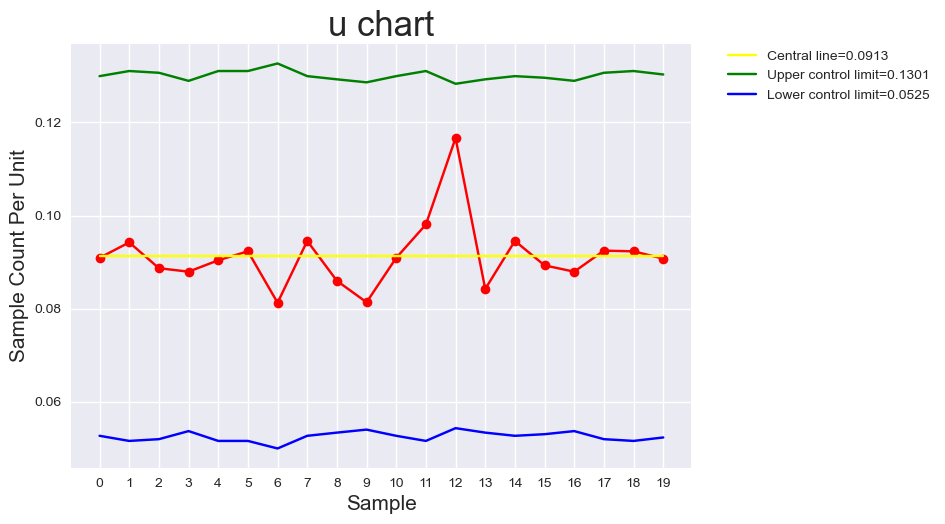

In [9]:
# Without predefined u-value
plot_uchart(x_axis=udata.index, y_axis=udata['Mean'], mu=ubar, ucl=uclbar, lcl=lclbar, ucl_mean=uclbar_mean, lcl_mean=lclbar_mean, title=r'u chart', x_label=r'Sample', y_label='Sample Count Per Unit')

u control chart generated in Minitab 17 for comparison:

<img src="minitab\uchart.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There are no points beyond the control limits, and there is no unwanted pattern. The process is in statistical control.